# Your working directory should contain external data files and code dependencies.#

In [2]:
getwd()
#r setwd() 'C:/Users/vergevaliant19/Miniconda3/envs/R_189'

[1] "C:/Users/vergevaliant19/Exploratory Data Analysis and Inference/Smoking & Birthweight"

## Load Dataset

In [3]:
data = read.table("babies23.txt", header=TRUE) #Load a text file
head(data) #Peak at data
#summary(data) #Summarize each column

id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
72,5,1,1425,282,1,108,1,0,23,...,0,24,5,99,999,1,1,1,1,5
100,5,1,1673,286,1,136,4,0,25,...,3,28,2,64,130,1,4,2,2,2


## Calculate Basic Point Estimates

In [4]:
mean(data$gestation) #sd, quantile as well

[1] 286.9078

## R Dataframe Basics

In [77]:
data[,1] #A simple raw data vector of column 1. One indexed.

[1]  2.0  0.0  0.0  0.5  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  3.0  1.0
[16]  0.0  0.0  0.0  2.0  0.0  2.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
[31]  0.0  1.0  0.0  0.0  0.0  0.1  0.5  1.0  0.0  0.0  0.0  2.0  2.0  0.5  0.0
[46]  2.0  0.0  0.0  0.0  2.0  0.0  0.0  0.5  3.0  0.0  0.0  0.0  4.0 30.0 14.0
[61]  0.0  0.0  0.0  0.5 14.0  1.0  0.0  0.0  1.5  0.0  0.0  2.0  0.0  0.0  0.0
[76]  0.0  0.0  0.0  0.0  2.0  1.0  0.0  0.0  2.0  0.0  2.0  2.0  5.0  0.0  3.0
[91]  0.0

In [78]:
data$bwt #A simple vector again

[1] 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1
[39] 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0
[77] 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0

In [79]:
#data['home'] #A useful dataframe of column 'home'

In [12]:
##Work with rows of data##
age_row = which(data['age']==35) #Selecting the row index of every '3' in 'grade' column
age_row
#Now we will use these indices to select all data from those rows
data_age35 = data[age_row,]
#data_grade3

[1]   81   99  123  129  191  226  273  292  316  410  477  507  594  641  643
[16]  694  749  752  776  853  889  922  946  968  979 1103 1109 1121 1147 1151

In [13]:
##Remove data easily##
data_nage35 = data[-age_row,]
#data_nGrade3

## Graphs Are Basic...

In [82]:
#Histograms are the first tool in a statisticians toolbox
#Use histograms to plot any column

## BUT FIRST, CLEAN DATA!

In [19]:
#We often clean data of entire bad rows
data_dirty = data[which(data$age >= 40),] #The dirty data with unknown row values
data_clean = data[which(data$age < 40),] #The clean and consistently labeled data
data_clean

,id,pluralty,outcome,date,gestation,sex,wt,parity,race,age,...,drace,dage,ded,dht,dwt,marital,inc,smoke,time,number
1,15,5,1,1411,284,1,120,1,8,27,...,8,31,5,65,110,1,1,0,0,0
2,20,5,1,1499,282,1,113,2,0,33,...,0,38,5,70,148,1,4,0,0,0
3,58,5,1,1576,279,1,128,1,0,28,...,5,32,1,99,999,1,2,1,1,1
4,61,5,1,1504,999,1,123,2,0,36,...,3,43,4,68,197,1,8,3,5,5
5,72,5,1,1425,282,1,108,1,0,23,...,0,24,5,99,999,1,1,1,1,5
6,100,5,1,1673,286,1,136,4,0,25,...,3,28,2,64,130,1,4,2,2,2
7,102,5,1,1449,244,1,138,4,7,33,...,7,37,4,99,999,1,98,0,0,0
8,129,5,1,1562,245,1,132,2,7,23,...,7,23,4,71,192,1,2,0,0,0
9,142,5,1,1408,289,1,120,3,0,25,...,3,26,1,70,180,0,2,0,0,0
10,148,5,1,1568,299,1,143,3,0,30,...,0,34,5,99,999,1,2,1,1,4


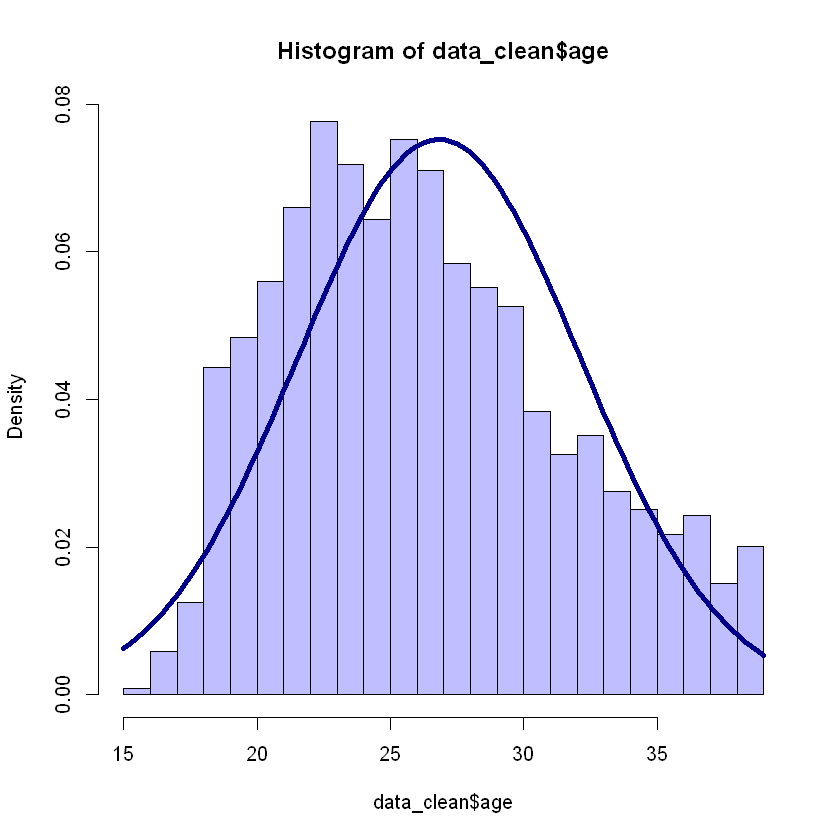

In [20]:
#Now that we have clean data, lets plot it
hist(data_clean$age, breaks = 30, col=rgb(0,0,1,1/4), probability=TRUE)
#We can also compare the histogram against a normal distribution curve generated from the mean and sd
curve(dnorm(x, mean=mean(data_clean$age), sd=sd(data_clean$age)), add=TRUE, col='darkblue', lwd=4)

In [26]:
#Basic Histogram Shape Estimates
#install.packages('moments') #First we need to install a package
#library(moments)
skewness(data_clean$age)
kurtosis(data_clean$age)

[1] 0.4344427

[1] 2.420861

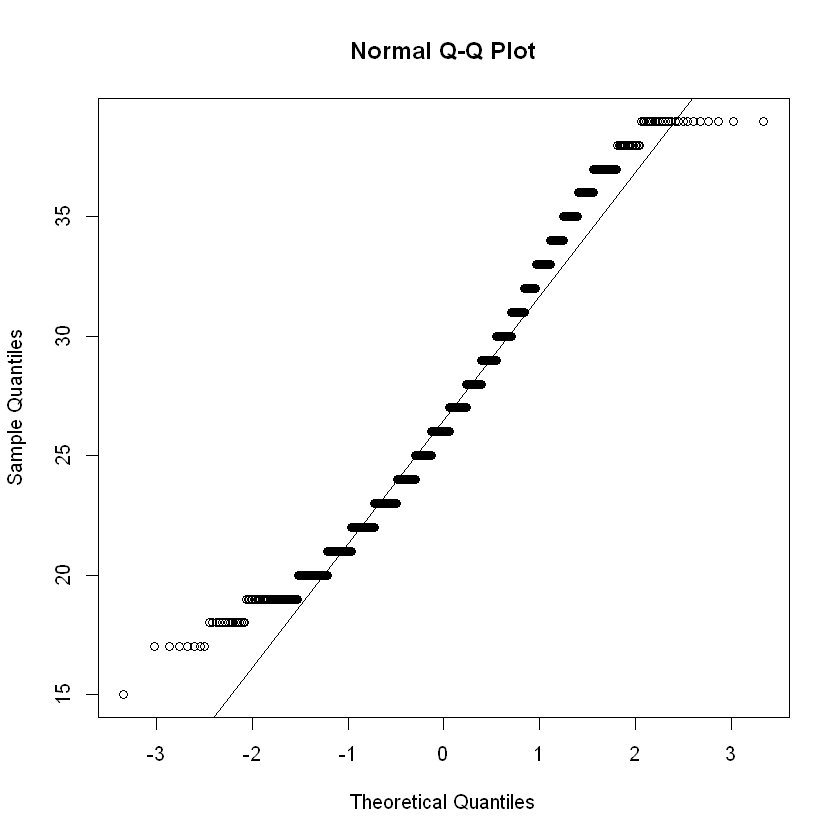

In [33]:
#QQ Plots
qqnorm(data_clean$age)
qqline(data_clean$age)